# Pymaceuticals Inc.
---

### Analysis

- Positive correlation exists between the weight of the mouse and the size of the tumors.
- Most of the mice were either treated with Capomulin or Ramicane.
- Capomulin has smaller variance than Infubinol, Ceftamin, and Propriva.
- Infubinol was the only drug that had an outlier.
- Propriva was the least used drug in the study.
- Ceftamin had a larger variance value in the final tumore volume then the other drugs.
- The divide between the male and female test subjects were very close to equal.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice.
mice_data = total_data['Mouse ID'].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = total_data[total_data[['Mouse ID', 'Timepoint']].duplicated() == True]
mice_duplicates_ID = mice_duplicates['Mouse ID'].unique()
mice_duplicates_ID

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates_data = total_data.loc[total_data['Mouse ID'] == mice_duplicates_ID[0]]
mice_duplicates_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_total_data['Mouse ID'].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice

249

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_data = clean_total_data.set_index(['Drug Regimen'])
group_regimen_data = regimen_data.groupby('Drug Regimen')

regimen_mean = group_regimen_data['Tumor Volume (mm3)'].mean()
regimen_median = group_regimen_data['Tumor Volume (mm3)'].median()
regimen_var = group_regimen_data['Tumor Volume (mm3)'].var()
regimen_stdev = group_regimen_data['Tumor Volume (mm3)'].std()
regimen_sem = group_regimen_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_data_df = pd.DataFrame({'Mean Tumor Volume':regimen_mean,
                                      'Median Tumor Volume': regimen_median,
                                      'Tumor Volume Variance': regimen_var,
                                      'Tumor Volume St. Dev.': regimen_stdev,
                                      'Tumor Volume St. Err.': regimen_sem})
regimen_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_regimen_data_df = regimen_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_regimen_data_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

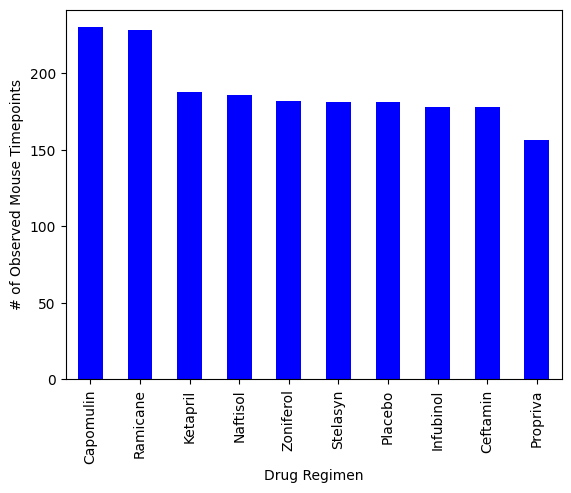

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter df
mice_with_drugs = clean_total_data[['Drug Regimen', 'Timepoint']]

# Find count per drug regimen
mice_per_regimen = mice_with_drugs['Drug Regimen'].value_counts()
mice_per_regimen

# Create bar chart
mice_per_regimen.plot(kind='bar', color='b', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')
plt.show()

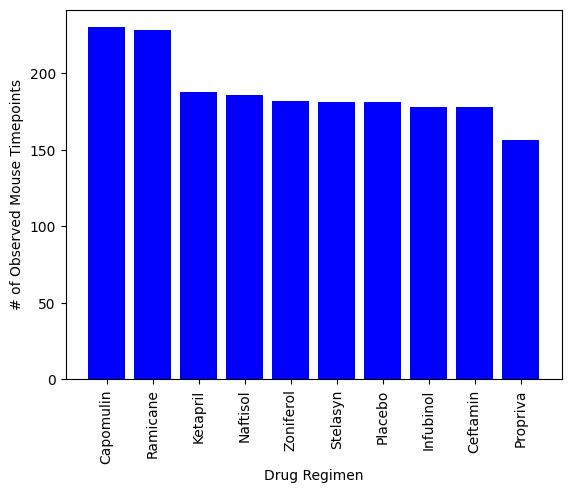

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = mice_per_regimen.index.values
count = mice_per_regimen.values

# Create bar chart
plt.bar(regimen, count, color='b', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

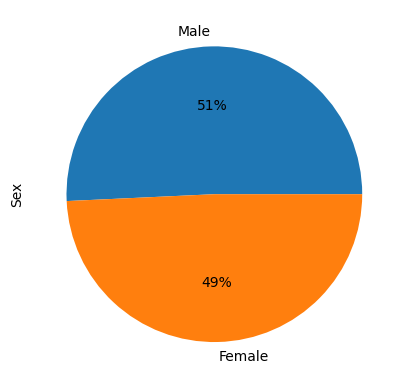

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
f_vs_m = clean_total_data['Sex'].value_counts()
sex = ['Female', 'Male']

f_vs_m.plot(kind='pie', autopct='%1.0f%%', ylabel='Sex')
plt.show()

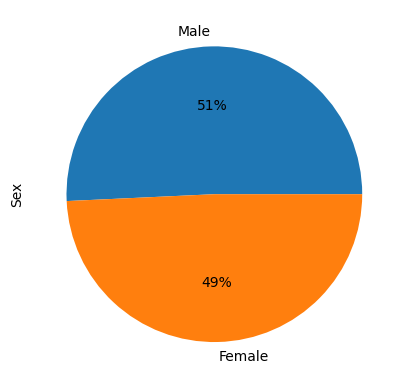

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = f_vs_m.index.values
count_value = f_vs_m.values

plt.ylabel('Sex')
plt.pie(count_value, labels=sex_label, autopct='%1.0f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
organized_drug_data = clean_total_data.loc[(clean_total_data['Drug Regimen'] == 'Capomulin')
                                        | (clean_total_data['Drug Regimen'] == 'Ramicane')
                                        | (clean_total_data['Drug Regimen'] == 'Infubinol')
                                        | (clean_total_data['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = organized_drug_data.groupby(['Drug Regimen', 'Mouse ID']).last()
new_greatest_timepoint = greatest_timepoint.reset_index()

organized_greatest_timepoint = new_greatest_timepoint[['Drug Regimen','Tumor Volume (mm3)']]
capomulin_df = new_greatest_timepoint.loc[new_greatest_timepoint['Drug Regimen'] == 'Capomulin']
ramicane_df = new_greatest_timepoint.loc[new_greatest_timepoint['Drug Regimen'] == 'Ramicane']
infubinol_df = new_greatest_timepoint.loc[new_greatest_timepoint['Drug Regimen'] == 'Infubinol']
ceftamin_df = new_greatest_timepoint.loc[new_greatest_timepoint['Drug Regimen'] == 'Ceftamin']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.DataFrame({'Capomulin': capomulin_df ['Tumor Volume (mm3)'],
                                      'Ramicane': ramicane_df ['Tumor Volume (mm3)'],
                                      'Infubinol': infubinol_df ['Tumor Volume (mm3)'],
                                      'Ceftamin': ceftamin_df ['Tumor Volume (mm3)']})
greatest_timepoint_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []

for drug in new_greatest_timepoint['Drug Regimen']:
    if drug not in treatment:
        treatment.append(drug)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    quartiles = greatest_timepoint_df[drug].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    drug_IQR = upper_quartile-lower_quartile
    
    upperq_list.append(upper_quartile)
    lowerq_list.append(lower_quartile)
    print(f"{drug}'s potential outliers")

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers
Ceftamin's potential outliers
Infubinol's potential outliers
Ramicane's potential outliers


Text(0.5, 0, '')

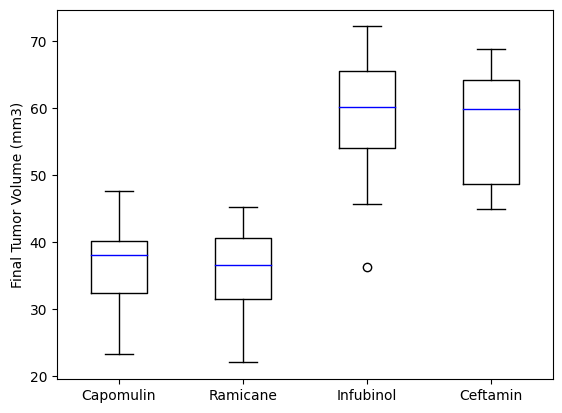

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = greatest_timepoint_df.boxplot(grid=False, color=dict(boxes='k', whiskers='k', medians='b'))
box_plot.set_ylabel('Final Tumor Volume (mm3)')
box_plot.set_xlabel('')

## Line and Scatter Plots

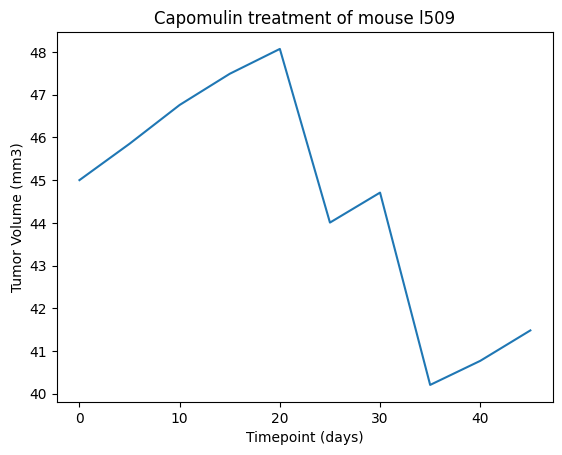

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_df.index.values
tumor_volu = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_volu)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

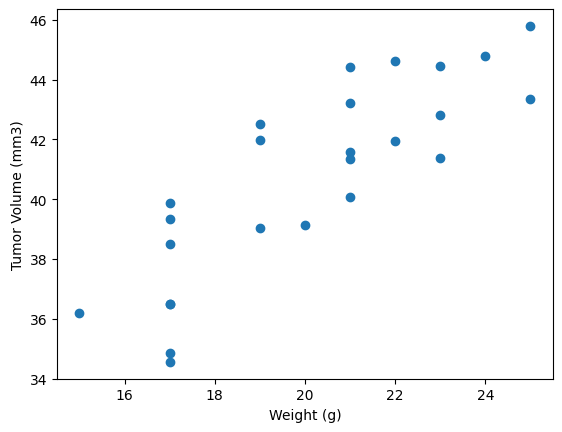

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data['Drug Regimen'] == 'Capomulin')]
group_capomulin_df = new_capomulin_df.groupby('Mouse ID')

avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


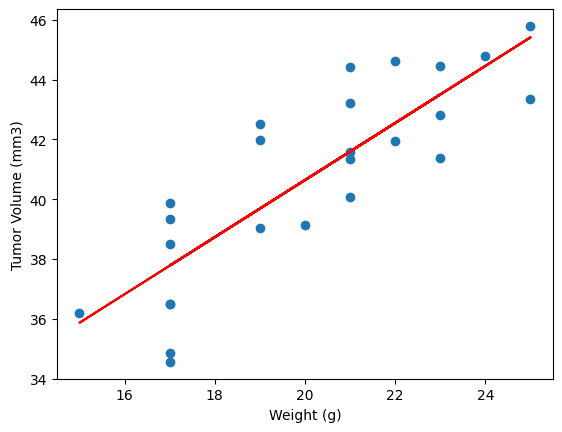

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = avg_capomulin_df["Weight (g)"]
y_values = avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()